In [55]:
## Import libraries
import os
import sys

import numpy as np
from datetime import datetime, timedelta, timezone

# graphics
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import cmocean
from NEDAS.utils.graphics import add_colorbar, adjust_ax_size
import ipywidgets as widgets
from IPython.display import display, HTML, Image, clear_output

from netCDF4 import Dataset
import xarray as xr

In [125]:
## Load benchmark output file
benchmark = Dataset('/home/nextsimdg/run/benchmark_32x32_test.diagnostic.nc')

# number of cycles
ncycle = len(benchmark['data']['time'])

2

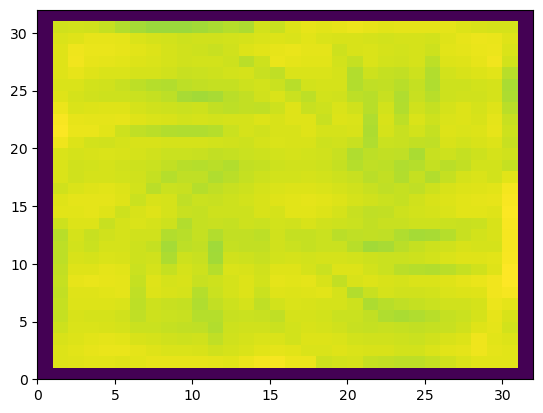

In [126]:

plt.pcolormesh(benchmark['data']['hice'][1,:,:,0])

In [210]:
# Load and set coordinates
ds32 = xr.open_mfdataset('/home/nextsimdg/run/benchmark_32x32.diagnostic.nc', group='data')
ds32 = ds.set_coords('x')
ds32 = ds.set_coords('y')

ds64 = xr.open_mfdataset('/home/nextsimdg/run/benchmark_64x64.diagnostic.nc', group='data')
ds64 = ds64.set_coords('x')
ds64 = ds64.set_coords('y')

ds128 = xr.open_mfdataset('/home/nextsimdg/benchmark_128x128.diagnostic.nc', group='data')
ds128 = ds128.set_coords('x')
ds128 = ds128.set_coords('y')

In [137]:
# Create time array
ntimes = len(ds['time'])
times = np.linspace(0,ntimes-1,ntimes)

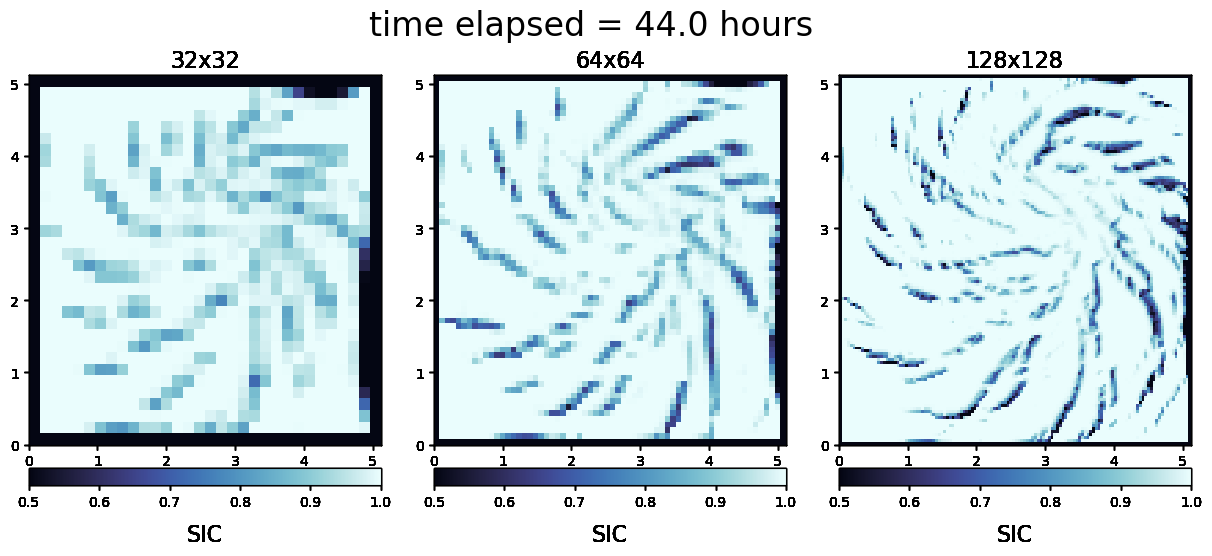

In [243]:
# import animation library
import matplotlib.animation as animation

# Set up figure
names = ['32x32', '64x64','128x128']
maxs = [1,1,1]
mins = [0.5,0.5, 0.5]
cmaps = [cmocean.cm.ice,cmocean.cm.ice,cmocean.cm.ice]

fig = plt.figure(figsize=(15,6))
spec = gridspec.GridSpec(ncols=3,nrows=1,wspace=0.15, hspace=0.2)

data = [ds32,ds64,ds128]

for nd, axe in enumerate(data):
    title = f'time elapsed = {times[0]*4} hours'
    fig.suptitle(f'{title}', y=0.99, fontsize=24)
    ax = fig.add_subplot(spec[nd])
    p_map = ax.pcolormesh(data[nd].x[0], data[nd].y[0], data[nd].cice[0,:,:,0], vmin = mins[nd], vmax = maxs[nd],cmap = cmaps[nd])

    ax.set_xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, 1, 2, 3, 4, 5])
    ax.set_yticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, 1, 2, 3, 4, 5])
    ax.set_title(names[nd],fontsize=16)
    a = fig.colorbar(p_map,location='bottom',pad=0.05)
    a.set_label(f'SIC',labelpad=10, fontsize=16)

def animate(i):
    for nd, axe in enumerate(data):
        title = f'time elapsed = {times[i]*4} hours'
        fig.suptitle(f'{title}', y=0.99, fontsize=24)
        ax = fig.add_subplot(spec[nd])
        p_map = ax.pcolormesh(data[nd].x[i], data[nd].y[i], data[nd].cice[i,:,:,0], vmin = mins[nd], vmax = maxs[nd],cmap = cmaps[nd])
    
        ax.set_xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, 1, 2, 3, 4, 5])
        ax.set_yticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, 1, 2, 3, 4, 5])
        ax.set_title(names[nd],fontsize=16)
        a = fig.colorbar(p_map,location='bottom',pad=0.05)
        a.set_label(f'SIC',labelpad=10, fontsize=16)

    return p_map

ani = animation.FuncAnimation(fig, animate, frames=ntimes, blit=False)
ani.save(f'/home/nextsimdg/ani_sic.mp4', writer='ffmpeg', fps=20, dpi = 300)
plt.show()
plt.close()

In [201]:
data[0]

<xarray.Dataset>
Dimensions:       (time: 12, ydim: 32, xdim: 32, dg_comp: 6, yvertex: 33,
                   xvertex: 33, ncoords: 2)
Coordinates:
  * time          (time) float64 1.673e+09 1.673e+09 ... 1.673e+09 1.673e+09
    x             (time, ydim, xdim) float64 dask.array<chunksize=(12, 32, 32), meta=np.ndarray>
    y             (time, ydim, xdim) float64 dask.array<chunksize=(12, 32, 32), meta=np.ndarray>
Dimensions without coordinates: ydim, xdim, dg_comp, yvertex, xvertex, ncoords
Data variables:
    cice          (time, ydim, xdim, dg_comp) float64 dask.array<chunksize=(12, 32, 32, 6), meta=np.ndarray>
    coords        (yvertex, xvertex, ncoords) float64 dask.array<chunksize=(33, 33, 2), meta=np.ndarray>
    grid_azimuth  (time, ydim, xdim) float64 dask.array<chunksize=(12, 32, 32), meta=np.ndarray>
    hice          (time, ydim, xdim, dg_comp) float64 dask.array<chunksize=(12, 32, 32, 6), meta=np.ndarray>
    hsnow         (time, ydim, xdim) float64 dask.array<chunksize=(12, 32, 32), meta=np.ndarray>
    shear         (time, ydim, xdim) float64 dask.array<chunksize=(12, 32, 32), meta=np.ndarray>
    u             (time, ydim, xdim) float64 dask.array<chunksize=(12, 32, 32), meta=np.ndarray>
    v             (time, ydim, xdim) float64 dask.array<chunksize=(12, 32, 32), meta=np.ndarray>

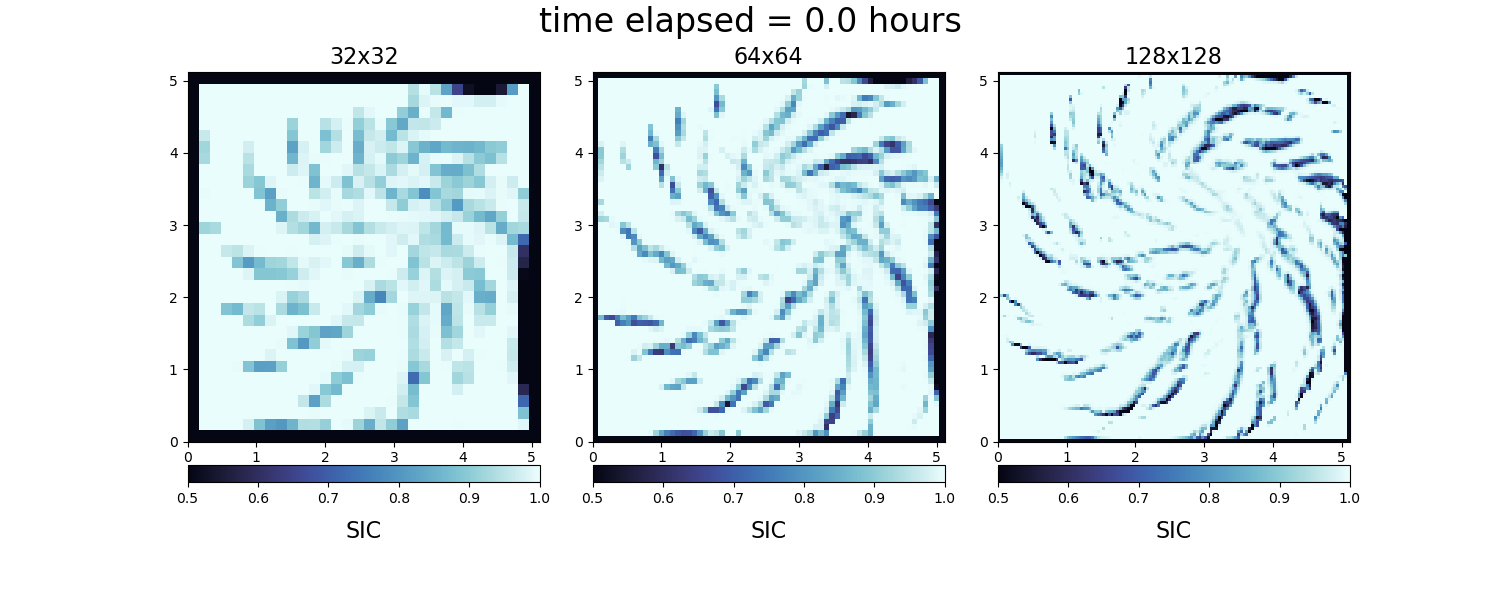

In [245]:
vname = ds.shear
cmap = cmocean.cm.dense
vmin = 0.5
vmax = 1
for n in range(ntimes):
    time = n
    fig = plt.figure(figsize=(15,6))
    spec = gridspec.GridSpec(ncols=3,nrows=1,wspace=0.15, hspace=0.2)
    
    data = [ds32,ds64,ds128]
    
    for nd, axe in enumerate(data):
        title = f'time elapsed = {times[0]*4} hours'
        fig.suptitle(f'{title}', y=0.99, fontsize=24)
        ax = fig.add_subplot(spec[nd])
        p_map = ax.pcolormesh(data[nd].x[n], data[nd].y[n], data[nd].cice[n,:,:,0], vmin = mins[nd], vmax = maxs[nd],cmap = cmaps[nd])
    
        ax.set_xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, 1, 2, 3, 4, 5])
        ax.set_yticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, 1, 2, 3, 4, 5])
        ax.set_title(names[nd],fontsize=16)
        a = fig.colorbar(p_map,location='bottom',pad=0.05)
        a.set_label(f'SIC',labelpad=10, fontsize=16)
    
    plt.savefig(os.path.join("/home/nextsimdg/", f"sic_{time}.png"))
    plt.close()

# show the last image
display(Image(os.path.join("/home/nextsimdg/", f"sic_11.png")))

In [247]:
## Slider figure
# view figures
slider_cycle = widgets.IntSlider(
    value=0,
    min=0,
    max=ntimes-1,
    step=1,
    description='Cycle:',
    continuous_update=False
)
output_cycle = widgets.Output()

def update_plot(n):
    with output_cycle:
        clear_output(wait=True)
        time = 0 + n
        display(Image(filename=os.path.join("/home/nextsimdg/", f"sic_{time}.png")))

widgets.interact(update_plot, n=slider_cycle)
display(output_cycle)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Cycle:', max=11), Output()), _d…

Output()